<a href="https://colab.research.google.com/github/mblackstock/notebooks/blob/main/notebooks/Movie_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Ratings

In this notebook we'll do some data loading, wrangling and plot some data from movie ratings.

GroupLens research https://grouplens.org/ provided data sets on movie ratings from the web site https://movielens.org/

The data contains movie ratings, movie meta data (genre and year) and info about the users that rated the movies.

In this example, we'll do some analysis of movies to see the differences between movies that male and females like or dislike.

First, we load the data we want to analyze.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# !git clone https://github.com/mblackstock/datasets.git

print("We're set up!")

We're set up!


Load the movie data

In [1]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movies/ml-1m/users.dat',sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movies/ml-1m/ratings.dat',sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genre']
movies = pd.read_table('datasets/movies/ml-1m/movies.dat',sep='::', header=None, names=mnames)


<ipython-input-1-9d7a21593699>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('../datasets/movies/ml-1m/users.dat',sep='::', header=None, names=unames)
<ipython-input-1-9d7a21593699>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('../datasets/movies/ml-1m/ratings.dat',sep='::', header=None, names=rnames)
<ipython-input-1-9d7a21593699>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifyi

Let's look at the tables to see what they look like:

In [16]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [17]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
movies[:5]

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


data analysis across multiple tables is hard.  To allow us to do analysis, we can merge all of the tables into one.

In [2]:
data = pd.merge(pd.merge(ratings, users), movies)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip         1000209 non-null  object
 8   title       1000209 non-null  object
 9   genre       1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


We can now pivot the table, with title as the index, and rating as the only column, using the mean aggregation function.  We now have the average rating of all movies!

In [19]:
data.pivot_table('rating', index='title', aggfunc='mean')

,rating
title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kj�rlighetens kj�tere) (1995),3.500000


Even more interesting would be to see how movie ratings vary by gender.  Lets do that:

In [38]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


Now, what we want to do is know what movies actually have been rated more than a few times, otherwise, noone really cares about those movies.  Once we know the ones that have been seen more than a few times we can focus on those.

In [4]:
ratings_by_title = data.groupby('title').size()
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kj�rlighetens kj�tere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

Now, lets get the index values of the ratings_by_title series where the number of ratings is greater than or equal to 250

In [22]:
active_titles = ratings_by_title.index[ratings_by_title >=250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

Now we select only the rows that are in the active titles list to see the movies that have been rated a lot

In [23]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


now, lets sort them by rating, descending order, and plot the top movie ratings

In [27]:
top_movies = mean_ratings.sort_values(by='F',ascending=False)
top_movies[:10]


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


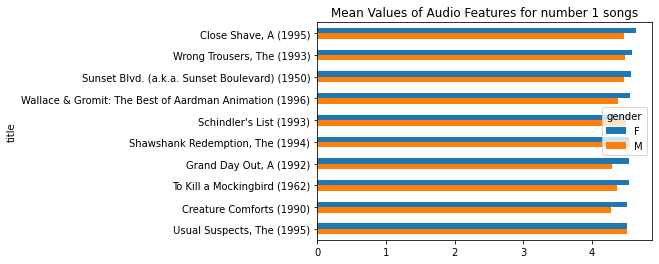

In [33]:
top_movies[:10].plot.barh().invert_yaxis()
plt.title('Mean Values of Audio Features for number 1 songs')
plt.show()

## Measuring Rating Disagreement

Lets add a new feature to the data that contains the difference between the mean ratings to see if there are differences in movie ratings based on gender, and variation on the ratings.

In [34]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


reversing the order of the rows, and slice off the top 10 to get the movies preferred by men.

Note the syntax for slice - we want all of the elements but step through them in reverse order (-1)

In [35]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Lets look a the movies that had the most disagreement between individual ratings indepedent of gender.  This means that the *standard deviation*, or the measure of the difference between individual measurements and the mean is the largest.  This might help us find the most 'contriversial' movies.

In [36]:
rating_std_by_title = data.groupby('title')['rating'].std()
# filter to only the active titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# sort descending and then show the top 10
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

It's interesting that Dumb and Dumber have a big difference rating, but not that surprising if you have seen the movie!

You will have noticed that the genres have been split using the `|` character.  With more processing we can analyse the movie data by genre.

What are some of the questions we can ask?